**IMPORTING NECESSARY DATA AND FILES**

Importing necessary header files

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
import pickle

Importing the dataset

In [2]:
data = pd.read_excel("Acoustic_Extinguisher_Fire_Dataset.xlsx")
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


**DATA PREPROCESSING**

Basic information about data 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [4]:
print(len(data.columns))

7


In [5]:
data.dtypes

SIZE           int64
FUEL          object
DISTANCE       int64
DESIBEL        int64
AIRFLOW      float64
FREQUENCY      int64
STATUS         int64
dtype: object

In [6]:
data.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [7]:
data.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

**DATA VISUALISATION**

In [9]:
data.FUEL.value_counts()

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

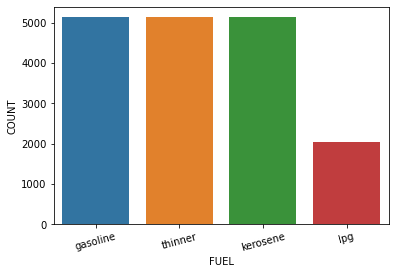

In [10]:
counts = data.FUEL.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('FUEL')
plt.ylabel('COUNT')
plt.xticks(rotation=15);

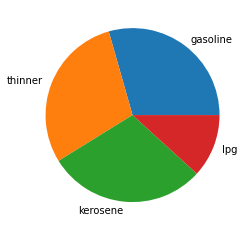

In [11]:
counts = data.FUEL.value_counts()
plt.pie(counts, labels = counts.index)
plt.show() 

In [12]:
data.STATUS.value_counts()

0    8759
1    8683
Name: STATUS, dtype: int64

Text(0, 0.5, 'COUNT')

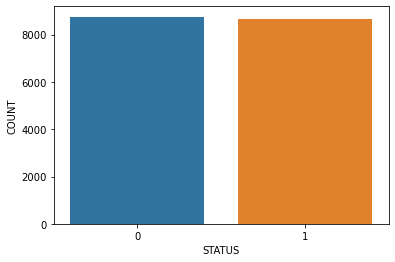

In [40]:
counts = data.STATUS.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('STATUS')
plt.ylabel('COUNT')


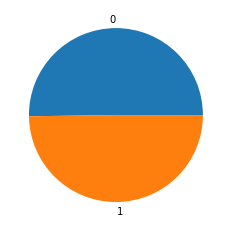

In [41]:
counts = data.STATUS.value_counts()
plt.pie(counts, labels = counts.index)
plt.show() 

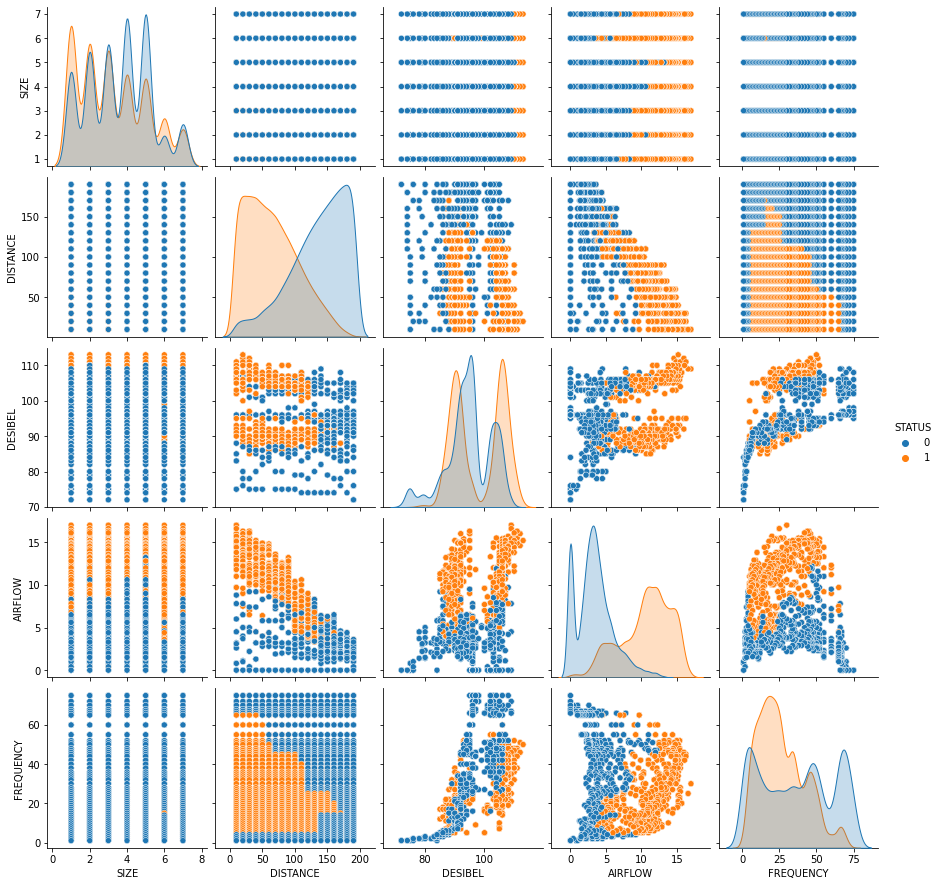

In [15]:
sns.pairplot(data, hue="STATUS")

**ENCODING**

In [16]:
le = LabelEncoder()
data['FUEL'] = le.fit_transform(data['FUEL'])

In [17]:
data.FUEL.value_counts()

0    5130
3    5130
1    5130
2    2052
Name: FUEL, dtype: int64

In [18]:
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1


In [19]:

data.rename(columns={'DESIBEL': 'DECIBEL'}, inplace=True)

In [20]:
X = data.drop(columns = ['STATUS'])
y = data.STATUS

In [21]:
X.head()

,SIZE,FUEL,DISTANCE,DECIBEL,AIRFLOW,FREQUENCY
0,1,0,10,96,0.0,75
1,1,0,10,96,0.0,72
2,1,0,10,96,2.6,70
3,1,0,10,96,3.2,68
4,1,0,10,109,4.5,67


In [22]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: STATUS, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 64)



Model :  DecisionTreeClassifier()
Train Accuracy :100.00% 
Test Accuracy :96.62% 
Accuracy Score: 0.97
mean squared error: 0.03


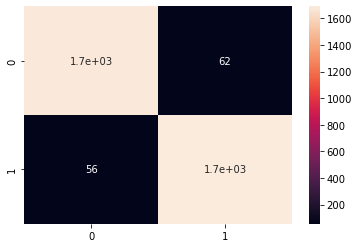



Model :  RandomForestClassifier()
Train Accuracy :100.00% 
Test Accuracy :96.25% 
Accuracy Score: 0.96
mean squared error: 0.04


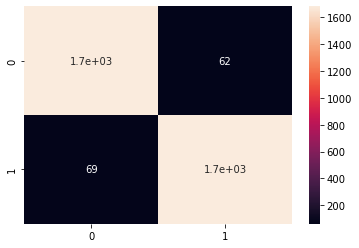



Model :  SVC()
Train Accuracy :89.01% 
Test Accuracy :89.08% 
Accuracy Score: 0.89
mean squared error: 0.11


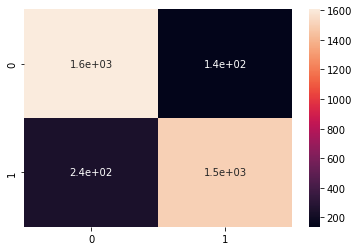



Model :  KNeighborsClassifier()
Train Accuracy :94.66% 
Test Accuracy :91.69% 
Accuracy Score: 0.92
mean squared error: 0.08


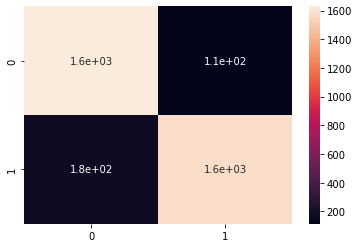

In [27]:
models = [DecisionTreeClassifier,RandomForestClassifier,SVC,KNeighborsClassifier]
accuracy_test=[]
model = []
for m in models:
    model_name = m()
    print('\n\nModel : ' , m())
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    pred_t = model_.predict(X_train)
    Acc_train = model_.score(X_train, y_train)
    Acc_test = model_.score(X_test, y_test)
    print ('Train Accuracy :{:.2f}% '.format(Acc_train*100))
    print ('Test Accuracy :{:.2f}% '.format(Acc_test*100))
    print('Accuracy Score: %.2f'% accuracy_score(y_test, pred))
    print('mean squared error: %.2f'% mean_squared_error(y_test, pred))
    cf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(cf_matrix, annot=True)
    plt.show()
    accuracy_test.append(Acc_test)
    model.append(model_name)
    

In [40]:
knn5= KNeighborsClassifier(n_neighbors = 15)

knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)


from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)

Accuracy with k=5 91.28690169102894


In [28]:
model = pd.Series(model, name='Model').astype(str)
acc_test = pd.Series(accuracy_test, name='Accuracy')
output = pd.concat([model, acc_test],axis=1)

In [29]:
print(output)

                      Model  Accuracy
0  DecisionTreeClassifier()  0.966179
1  RandomForestClassifier()  0.962453
2                     SVC()  0.890800
3    KNeighborsClassifier()  0.916882


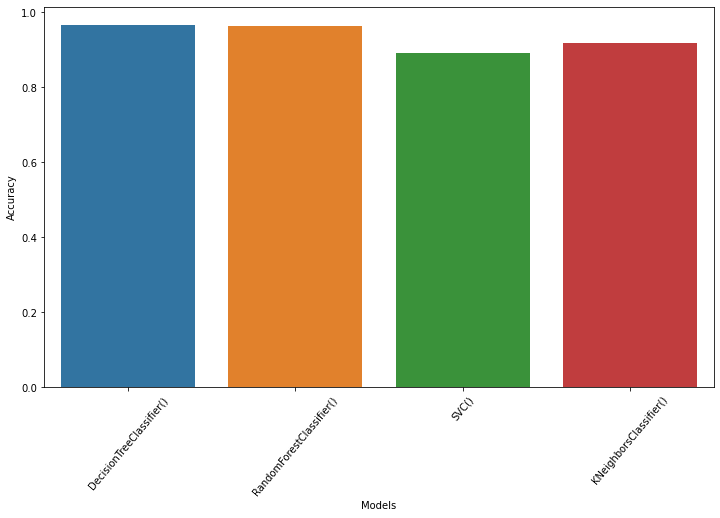

In [36]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=output)


plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=50);

In [37]:
p= DecisionTreeClassifier()

p.fit(X_train.values, y_train.values)
temp=[[1,0,20,96,0.0,75]]
ans=p.predict(temp)
print(ans)

#print(ans)


[0]


In [38]:
pickle.dump(p, open('model.pkl','wb'))

Forest damage prediction

In [8]:
import numpy as np
from flask import Flask, request, render_template
import pickle
app = Flask(__name__, template_folder='template')


# read our pickle file and label our logisticmodel as model
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('untitled.html')

@app.route('/index')
def index():
    return render_template('index.html')

@app.route('/index1')
def index1():
    return render_template('index1.html')


@app.route('/predict',methods=['POST','GET'])
def predict():

    int_features = [x for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    
    if prediction[0]==1:
        return render_template('index.html',
                               prediction_text='Extinguished'.format(prediction),
                               )
    elif prediction[0]==0:
        return render_template('index.html',
                               prediction_text='Not extinguishe'.format(prediction),
                              )


app.run(debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Aug/2022 21:39:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2022 21:39:54] "GET /index HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2022 21:39:57] "GET /index1 HTTP/1.1" 200 -
127.0.0.1 - - [13/Aug/2022 21:39:57] "GET /static/styles/CSS.css HTTP/1.1" 304 -
127.0.0.1 - - [13/Aug/2022 21:40:09] "POST /result HTTP/1.1" 404 -
127.0.0.1 - - [13/Aug/2022 21:40:09] "POST /result HTTP/1.1" 404 -
127.0.0.1 - - [13/Aug/2022 21:40:09] "POST /result HTTP/1.1" 404 -
